In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

['Day - Dataset.csv']


In [2]:
df = pd.read_csv("../input/Day - Dataset.csv",index_col = 0)

In [3]:
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822


In [4]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

**Exploratory Data Analysis**

In [5]:
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
#Converting variables datatype to required datatypes
#Categorical variables
df['dteday'] = pd.to_datetime(df['dteday'],yearfirst = True)
df['season'] = df['season'].astype('category')
df['yr']     = df['yr'].astype('category')
df['mnth']   = df['mnth'].astype('category')
df['holiday']= df['holiday'].astype('category')
df['weekday']= df['weekday'].astype('category')
df['workingday']= df['workingday'].astype('category')
df['weathersit']= df['weathersit'].astype('category')

#Continuous variables
df['temp'] = df['temp'].astype('float')
df['atemp']= df['atemp'].astype('float')
df['hum']  = df['hum'].astype('float')
df['windspeed'] = df['windspeed'].astype('float')
df['casual'] = df['casual'].astype('float')
df['registered'] = df['registered'].astype('float')
df['cnt'] = df['cnt'].astype('float')

In [7]:
df.dtypes

dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                  float64
dtype: object

In [8]:
ordered_data = df.copy()

**Missing Value Analysis**

In [9]:
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns={'index':'variable',0:'Missing_values'})

In [10]:
missing_val

,variable,Missing_values
0,dteday,0
1,season,0
2,yr,0
3,mnth,0
4,holiday,0
5,weekday,0
6,workingday,0
7,weathersit,0
8,temp,0
9,atemp,0


****Distribution of Data by Visualizations**

In [11]:
#Craeting new variables from existing variables for visualizations (Future Engineering)
df['actual_temp'] = df['temp'] * 39
df['actual_atemp'] = df['atemp'] * 50
df['actual_windspeed'] = df['windspeed'] * 67
df['actual_hum'] = df['hum'] * 100

In [12]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'actual_temp', 'actual_atemp', 'actual_windspeed',
       'actual_hum'],
      dtype='object')

In [13]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,actual_temp,actual_atemp,actual_windspeed,actual_hum
instant,,,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,13.422513,18.18125,10.749882,80.5833
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,14.175642,17.68695,16.652113,69.6087
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,7.658196,9.47025,16.636703,43.7273
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,7.800000,10.60610,10.739832,59.0435
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,8.851323,11.46350,12.522300,43.6957


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


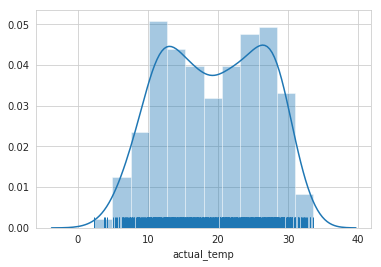

In [14]:
#Cheking the Distribution of data by using Histograms
sns.set_style("whitegrid")
sns.distplot(df['actual_temp'],rug=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


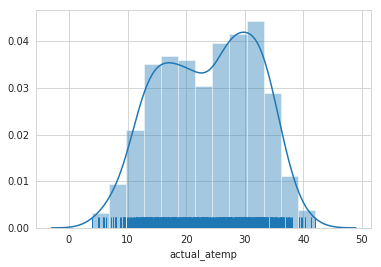

In [15]:
sns.distplot(df['actual_atemp'], rug=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


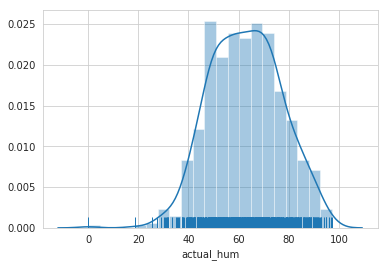

In [16]:
sns.distplot(df['actual_hum'], rug=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


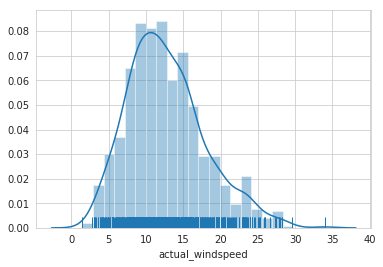

In [17]:
sns.distplot(df['actual_windspeed'],rug=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


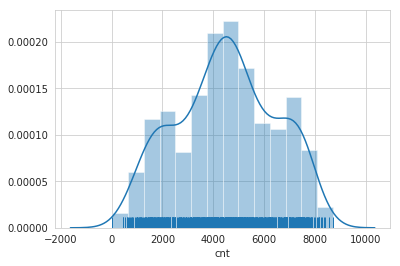

In [18]:
sns.distplot(df['cnt'],rug=True)

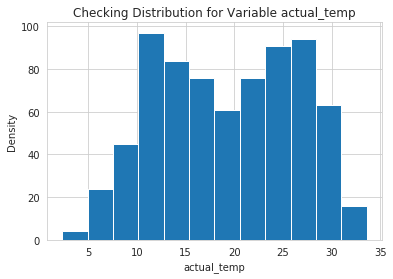

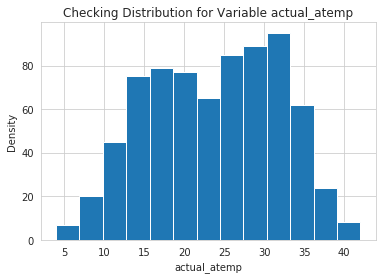

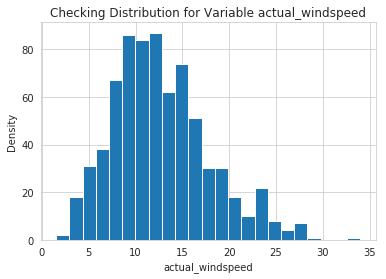

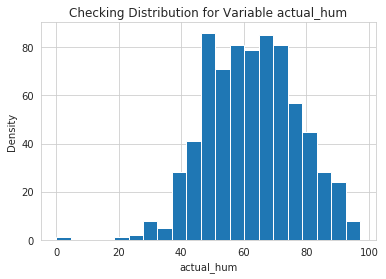

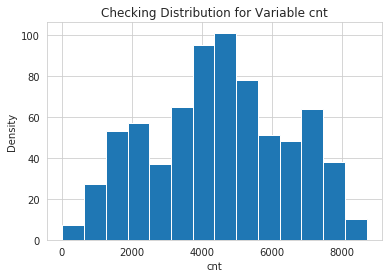

In [19]:
continuous_variables = ['actual_temp','actual_atemp','actual_windspeed','actual_hum','cnt']
for i in continuous_variables:
    plt.hist(df[i],bins='auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.xlabel(i)
    plt.show()

mnth
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
dtype: int64


Text(0, 0.5, 'Total Number of Bikes')

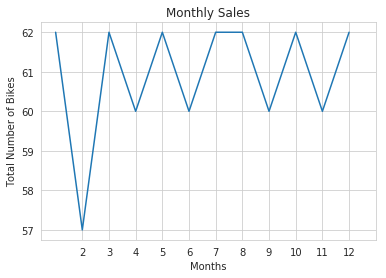

In [20]:
#Bike Rentals Per Monthly
monthly_sales = df.groupby('mnth').size()
print(monthly_sales)
#Plotting the Graph
plot = monthly_sales.plot(title='Monthly Sales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot.set_xlabel('Months')
plot.set_ylabel('Total Number of Bikes')

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update y

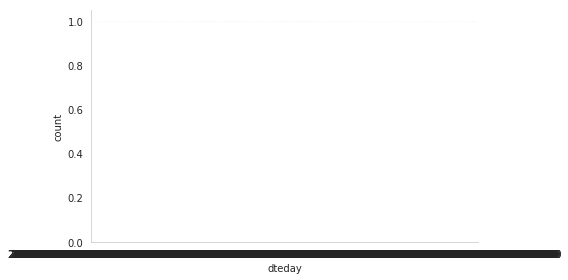

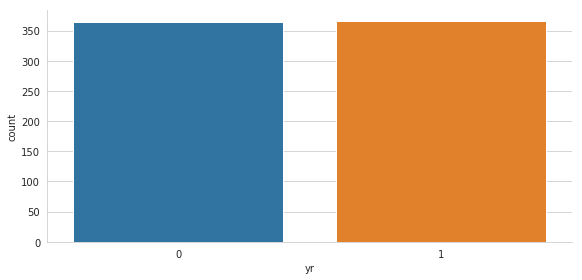

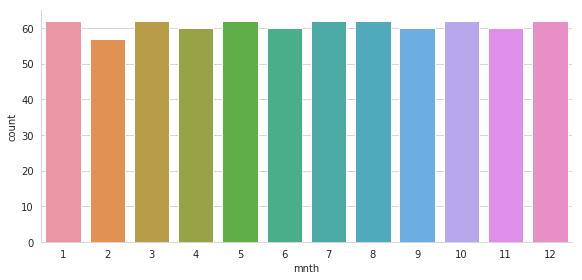

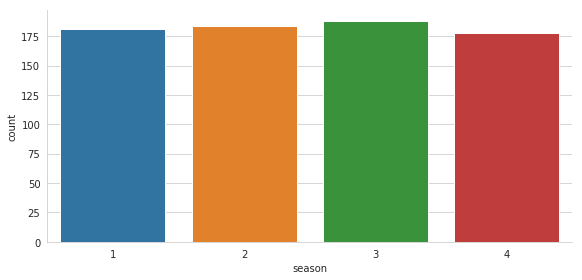

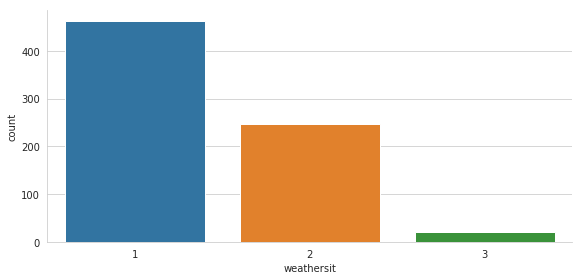

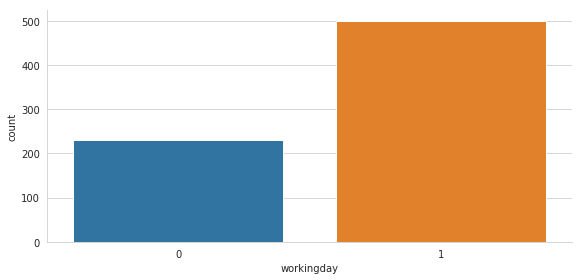

In [21]:
#Checking the distribution categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=df, x='dteday', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='yr', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='mnth', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='season', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='weathersit', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='workingday', kind= 'count',size=4,aspect=2)


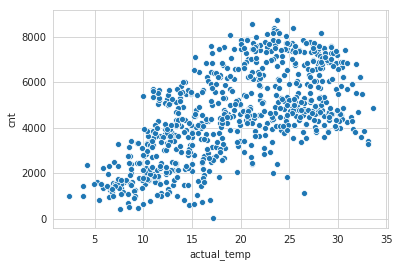

In [22]:
#Scatter plot for temprature against bike rentals 
sns.scatterplot(data=df,x='actual_temp',y='cnt')


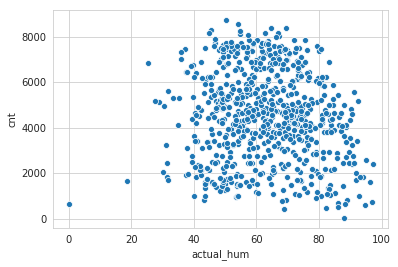

In [23]:
#Scatter plot for humidity against bike rentals 
sns.scatterplot(data=df,x='actual_hum',y='cnt')


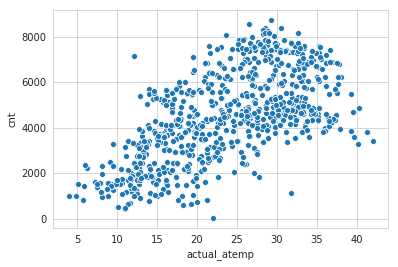

In [24]:
#Scatter plot for atemp(feeled_temparature) against bike rentals 
sns.scatterplot(data=df,x='actual_atemp',y='cnt')

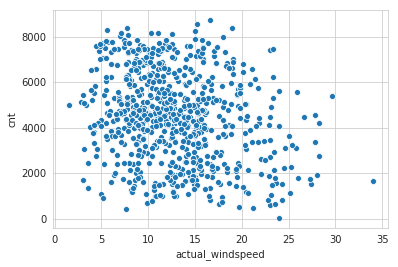

In [25]:
#Scatter plot for windspeed against bike rentals 
sns.scatterplot(data=df,x='actual_windspeed',y='cnt')

**Outlier Analysis**

In [26]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'actual_temp', 'actual_atemp', 'actual_windspeed',
       'actual_hum'],
      dtype='object')

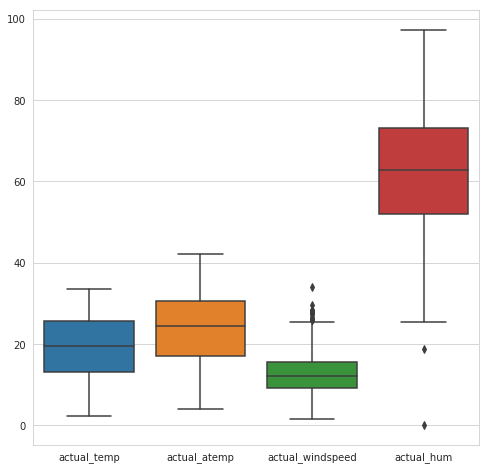

In [27]:
#Checking Outliers in  data using boxplot
sns.boxplot(data=df[['actual_temp','actual_atemp','actual_windspeed','actual_hum']])
fig=plt.gcf()
fig.set_size_inches(8,8)

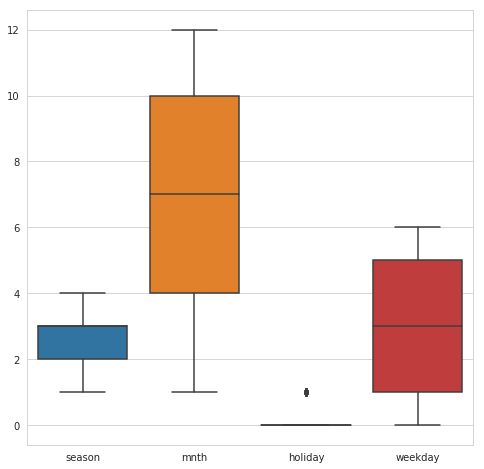

In [28]:
sns.boxplot(data=df[['season','mnth','holiday','weekday']])
fig=plt.gcf()
fig.set_size_inches(8,8)

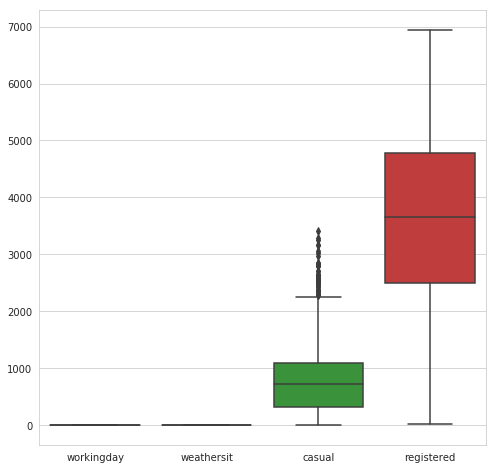

In [29]:
sns.boxplot(data=df[['workingday','weathersit','casual','registered']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [30]:
#Variables that are used to remove outliers
#Not considering casual because this is not predictor variable
#Not considering holiday because workingday variable includes holiday, so therte is no useful of considering holiday variables.
out_names = ['actual_windspeed','actual_hum']

In [31]:
#Detecting and Removing Outliers
for i in out_names :
    print (i)
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    df = df.drop(df[df.loc[:,i] < min].index)
    df = df.drop(df[df.loc[:,i] > max].index)   

actual_windspeed
-0.8339322500000019
25.50095375
actual_hum
21.22383749999999
104.51573750000001


**Future Selection**

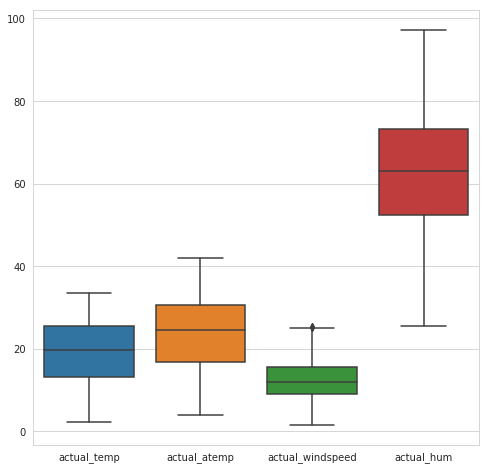

In [32]:
#Checking Outliers in data after outliers removel using boxplot
sns.boxplot(data=df[['actual_temp','actual_atemp','actual_windspeed','actual_hum']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [33]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,actual_temp,actual_atemp,actual_windspeed,actual_hum
instant,,,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,13.422513,18.18125,10.749882,80.5833
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,14.175642,17.68695,16.652113,69.6087
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,7.658196,9.47025,16.636703,43.7273
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,7.800000,10.60610,10.739832,59.0435
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,8.851323,11.46350,12.522300,43.6957


In [34]:
continuous_variables = [ 'temp','atemp', 'hum', 'windspeed', 'casual',
                        'registered', 'cnt', 'actual_temp', 'actual_atemp', 'actual_windspeed', 'actual_hum']

[]

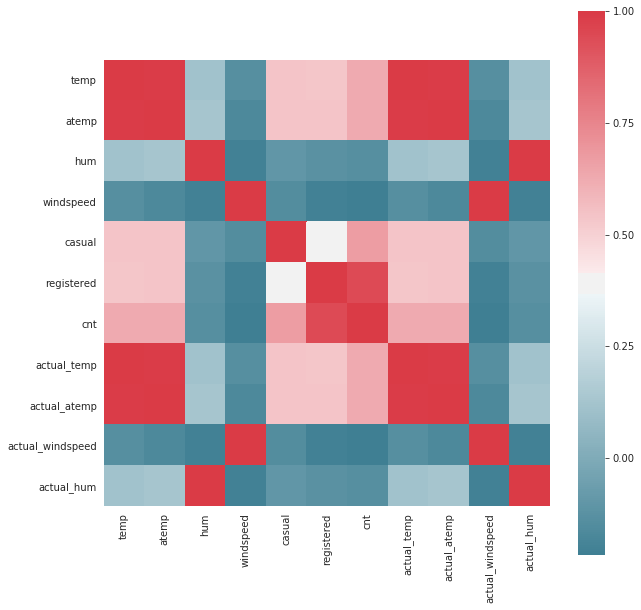

In [35]:
#Future selection on the basis of Correlation, multcollinearity and variable importance
#cnames = ["actual_temp","actual_atemp","actual_hum","acttual_windspeed"]
#cnames = ["temp","atemp","hum","windspeed"]

df_cor = df.loc[:,continuous_variables]
f, ax = plt.subplots(figsize=(10,10))

#Generate correlation matrix
cor_mat = df_cor.corr()

#Plot using seaborn library
sns.heatmap(cor_mat, mask=np.zeros_like(cor_mat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.plot()

**Hypothesis Testing**                                                                                                         
**Null Hypothesis**                                                                                                           
     Two variables are independant                                                                                             
     
**Alternate Hypothesis**                                                                                                       
     Two variables are not independant**
 
> If p-value is less than 0.05 then reject null hypothesis, that means two are variables are dependant(not independant)
> but in our case most of the p-value are greater than 0.05,hence we need to accept taht we failed to reject null hypothesis 
 



In [36]:
cat_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']
# making every combinationfrom cat_columns
factors_paired = [(i,j) for i in cat_columns for j in cat_columns]
factors_paired
p_values = [] 
from scipy.stats import chi2_contingency 
for factor in factors_paired:
    if factor[0] != factor[1]:
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(df[factor[0]], df[factor[1]]))
        p_values.append(p.round(3))
    else:
        p_values.append('-') 
p_values = np.array(p_values).reshape((7,7))
p_values = pd.DataFrame(p_values, index=cat_columns, columns=cat_columns)
print(p_values)

           season     yr   mnth holiday weekday workingday weathersit
season          -  0.999    0.0   0.641     1.0      0.946      0.013
yr          0.999      -    1.0   0.995     1.0      0.956      0.183
mnth          0.0    1.0      -   0.571     1.0      0.993       0.01
holiday     0.641  0.995  0.571       -     0.0        0.0      0.599
weekday       1.0    1.0    1.0     0.0       -        0.0      0.249
workingday  0.946  0.956  0.993     0.0     0.0          -      0.294
weathersit  0.013  0.183   0.01   0.599   0.249      0.294          -


In [37]:
# checking vif of numerical column without dropping multicollinear column 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf 
from statsmodels.tools.tools import add_constant
continuous = add_constant(df[['temp', 'atemp', 'hum', 'windspeed']])
vif = pd.Series([vf(continuous.values, i) for i in range(continuous.shape[1])], index = continuous.columns) 
print(vif.round(1))

# Checking VIF values of numeric columns after dropping column atemp 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf 
from statsmodels.tools.tools import add_constant
continuous = add_constant(df[['temp', 'hum', 'windspeed']]) 
vif = pd.Series([vf(continuous.values, i)  for i in range(continuous.shape[1])], index = continuous.columns) 
vif.round(1)

const        46.4
temp         63.3
atemp        63.9
hum           1.1
windspeed     1.1
dtype: float64


const        41.6
temp          1.0
hum           1.1
windspeed     1.1
dtype: float64

In [38]:
#Removing variables atemp beacuse it is highly correlated with temp,
#Removing weekday,holiday because they don't contribute much to the independent cariable
#Removing Causal and registered becuase that's what we need to predict.
df = df.drop(columns=['holiday','dteday','atemp','casual','registered','actual_temp','actual_atemp',
                      'actual_windspeed','actual_hum'])

In [39]:
df.head(10)

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,
1,1,0,1,6,0,2,0.344167,0.805833,0.160446,985.0
2,1,0,1,0,0,2,0.363478,0.696087,0.248539,801.0
3,1,0,1,1,1,1,0.196364,0.437273,0.248309,1349.0
4,1,0,1,2,1,1,0.200000,0.590435,0.160296,1562.0
5,1,0,1,3,1,1,0.226957,0.436957,0.186900,1600.0
6,1,0,1,4,1,1,0.204348,0.518261,0.089565,1606.0
7,1,0,1,5,1,2,0.196522,0.498696,0.168726,1510.0
8,1,0,1,6,0,2,0.165000,0.535833,0.266804,959.0
9,1,0,1,0,0,1,0.138333,0.434167,0.361950,822.0


In [40]:
df.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'cnt'],
      dtype='object')

In [41]:
df2 = df.copy()

In [42]:
categorical_var = ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']

In [43]:
df2.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'cnt'],
      dtype='object')

In [44]:
#Dummy Variable creation for categorical variables
df2 = pd.get_dummies(data = df2,columns=categorical_var)

In [45]:
df2.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [46]:
df2['count'] = df2['cnt'] 
df2 =  df2.drop('cnt',axis=1)
df2.columns

Index(['temp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'count'],
      dtype='object')

In [47]:
df_plt_tree = df2.drop('count',axis=1) 
df2.shape

(717, 34)

**Model Development**

In [48]:
#Import Libraries for decision tree
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree

In [49]:
#Splitting data into train and test data
train,test = train_test_split(df2,test_size = 0.2, random_state = 123)

In [50]:
#Function for Performing all the tasks such as Error metrix rmse,mape,r-squared,accuracy,predictions
def evaluate(model, test_features, test_actual):
    predictions = model.predict(test_features)
    #Creating new data frame with comparing actual and predicted values
    df_Dt = pd.DataFrame({'actual':test_actual,'predicted':predictions})
    errors = abs(predictions - test_actual)
    mape = 100 * np.mean(errors / test_actual)
    accuracy = 100 - mape
    rmse = np.sqrt(mean_squared_error(test_actual,predictions))
    rsquared = r2_score(test_actual, predictions)
    print('<---Model Performance--->')
    print('R-Squared Value = {:0.2f}'.format(rsquared))
    print('RMSE = {:0.2f}'.format(rmse))
    print('MAPE = {:0.2f}'.format(mape))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return

**Decision Tree**

In [51]:
#Decision Tree model development
#Training the model with train data
model = DecisionTreeRegressor(random_state = 123).fit(train.iloc[:,0:33],train.iloc[:,33])

#Function for predictions, Error metrix rmse,mape,r-squared,accuracy
evaluate(model, test.iloc[:,0:33], test.iloc[:,33])

dotfile = open("pt.dot",'w')
df = tree.export_graphviz(model,out_file=dotfile,feature_names = df_plt_tree.columns)

<---Model Performance--->
R-Squared Value = 0.73
RMSE = 962.42
MAPE = 17.75
Accuracy = 82.25%.


**Linear Regression**

In [52]:
#import libraries for Linear regression
from sklearn.linear_model import LinearRegression

#Create model Linear Regression using LinearRegression
model = LinearRegression().fit(train.iloc[:,0:33],train.iloc[:,33])

#Function for predictions, Error metrix rmse,mape,r-squared,accuracy
evaluate(model, test.iloc[:,0:33], test.iloc[:,33])

<---Model Performance--->
R-Squared Value = 0.78
RMSE = 876.15
MAPE = 17.08
Accuracy = 82.92%.


**Random forest**

In [53]:
#Import the libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor
#Train the model
Rf_model = RandomForestRegressor(n_estimators=500,random_state=123).fit(train.iloc[:,0:33], train.iloc[:,33])

#Function for predictions, Error metrix rmse,mape,r-squared,accuracy
evaluate(Rf_model, test.iloc[:,0:33], test.iloc[:,33])

<---Model Performance--->
R-Squared Value = 0.87
RMSE = 669.23
MAPE = 12.89
Accuracy = 87.11%.


**Hyperparameter Tunnig**

In [54]:
#Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [12,14,16],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2,3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [900,1000,1200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [55]:
grid_search.fit(test.iloc[:,0:33], test.iloc[:,33])
grid_search.best_params_
best_grid = grid_search.best_estimator_
#Applying gridsearchcsv to test data
grid_accuracy = evaluate(best_grid,test.iloc[:,0:33],test.iloc[:,33])

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.3min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<---Model Performance--->
R-Squared Value = 0.94
RMSE = 463.84
MAPE = 9.68
Accuracy = 90.32%.
